In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset 
file_path = r"C:\Users\Mokaya21\OneDrive\Desktop\DA\Les projets\customer_churn_dataset-testing-master.csv.zip"
df = pd.read_csv(file_path, compression = "zip")

# Check the characteristics of the dataset
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [3]:
# Check the last 5 rows of the dataset
df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [4]:
# Check for null and missing values
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# Summary statistics
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


These steps ensured our dataset was clean, consistent, and ready for in-depth analysis and visualization. This process lays the foundation for accurate and meaningful insights.

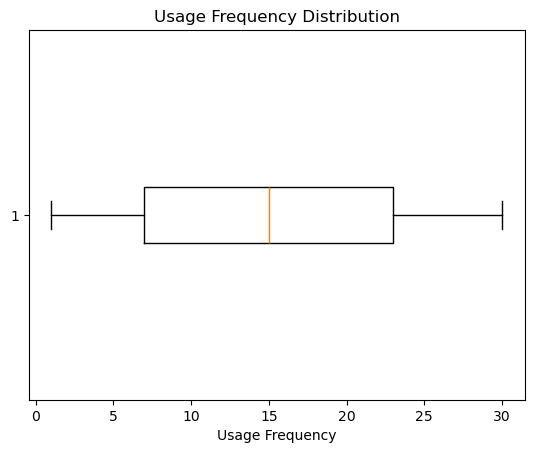

In [8]:
# Create boxplot to check outliers in "Usage Frequency" column
plt.boxplot(df['Usage Frequency'], vert=False)
plt.xlabel('Usage Frequency')
plt.title('Usage Frequency Distribution');

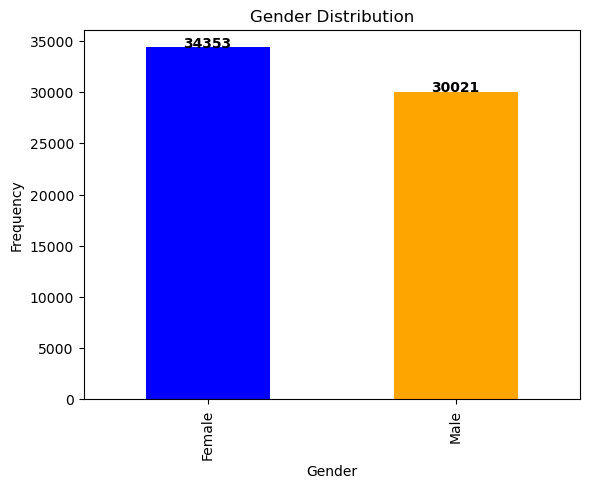

In [10]:
# Create bar chart to check distribution of genders
df['Gender'].value_counts().plot(kind = 'bar', color = ['blue', 'orange'])
plt.title('Gender Distribution')
plt.ylabel('Frequency')

# Add data labels to each bar
for index, value in enumerate(df['Gender'].value_counts()):
    plt.text(index, value + 0.5, str(value), ha='center', fontweight='bold')  # Adjust position with 'value + 0.5'
plt.show()

In [7]:
# Create a new column 'Adjusted Tenure' based on 'Contract Length'
df['Adjusted Tenure'] = df['Tenure'] # Copy original 'Tenure' values into the new column

# Apply custom calculations to 'Adjusted Tenure'
df.loc[df['Contract Length'] == 'Annual', 'Adjusted Tenure'] = df['Tenure'] * 12
df.loc[df['Contract Length'] == 'Quarterly', 'Adjusted Tenure'] = df['Tenure'] * 4

df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Adjusted Tenure
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1,25
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0,28
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0,324
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0,36
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0,696


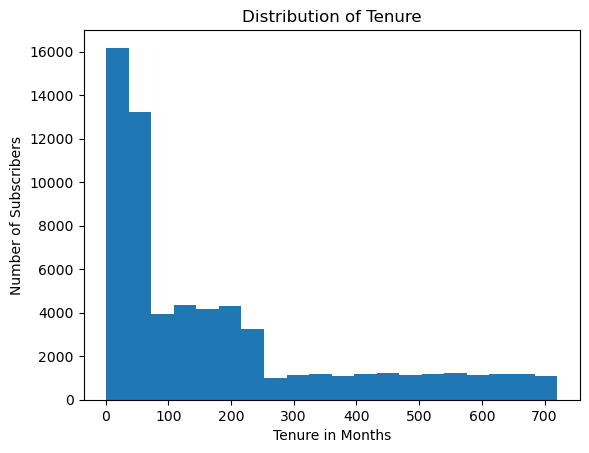

In [11]:
# Create histogram to check distribution of tenure
plt.hist(df['Adjusted Tenure'], bins=20)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure in Months')
plt.ylabel('Number of Subscribers')
plt.show()

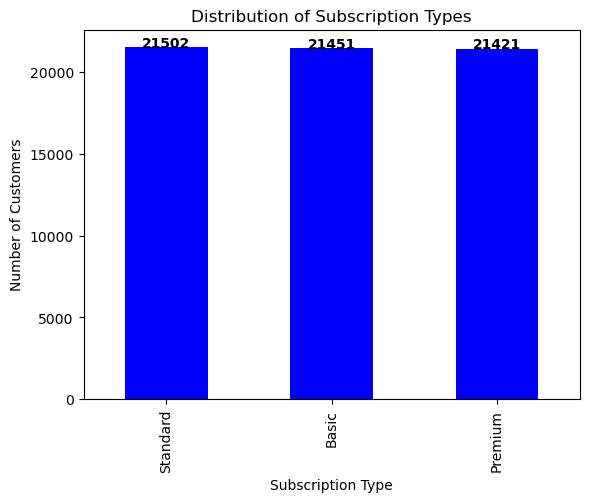

In [12]:
# Bar plot to check the distribution of subscription types
df['Subscription Type'].value_counts().plot(kind = 'bar', color = 'blue')
plt.ylabel('Number of Customers')
plt.title('Distribution of Subscription Types')

# Add data labels to the bar chart
for index, value in enumerate(df['Subscription Type'].value_counts()):
    plt.text(index, value + 0.5, str(value), ha='center', fontweight='bold')
plt.show()

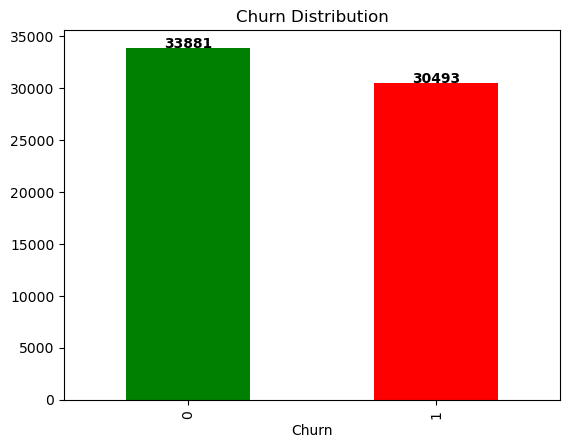

In [13]:
# Barplot to check churn distribution
df['Churn'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Churn Distribution')

# Add data labels to the bar plot
for index, value in enumerate(df['Churn'].value_counts()):
    plt.text(index, value + 0.5, str(value), ha='center', fontweight='bold')
plt.show()

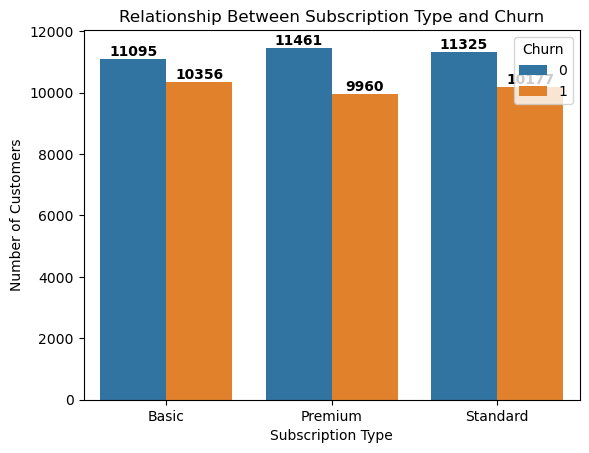

In [14]:
# Bar plot to check r/ship between 'Subscription Type' and 'Churn'

#Group by 'Subscription Type' and 'Churn' to get the count of each
churn_data = df.groupby(['Subscription Type', 'Churn']).size().reset_index(name='Count')

# Create bar plot
sns.barplot(x = 'Subscription Type', y = 'Count', hue = 'Churn', data = churn_data)
plt.title('Relationship Between Subscription Type and Churn')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Customers')

# Add data labels to the bar plot
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, fontweight='bold')
plt.show()

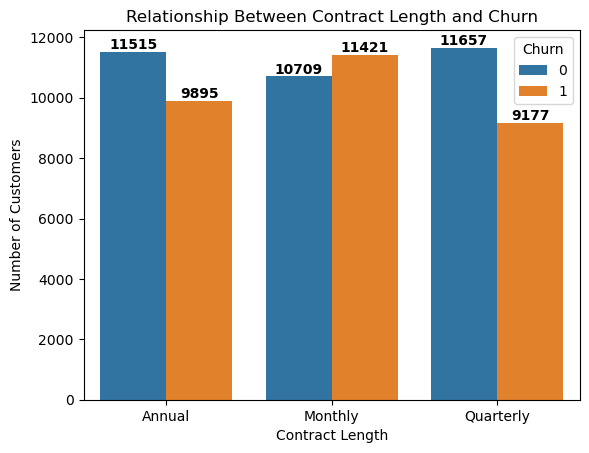

In [15]:
# Bar chart to show r/ship between 'Contract Length' and 'Churn'

# Group by 'Contract Length' and 'Churn' to get the count of each
contract_churn = df.groupby(['Contract Length', 'Churn']).size().reset_index(name='Count')

# Create bar plot
sns.barplot(x = 'Contract Length', y = 'Count', hue = 'Churn', data = contract_churn)
plt.title('Relationship Between Contract Length and Churn')
plt.xlabel('Contract Length')
plt.ylabel('Number of Customers')

# Add  data labels to the bar chart
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, fontweight='bold')
plt.show()

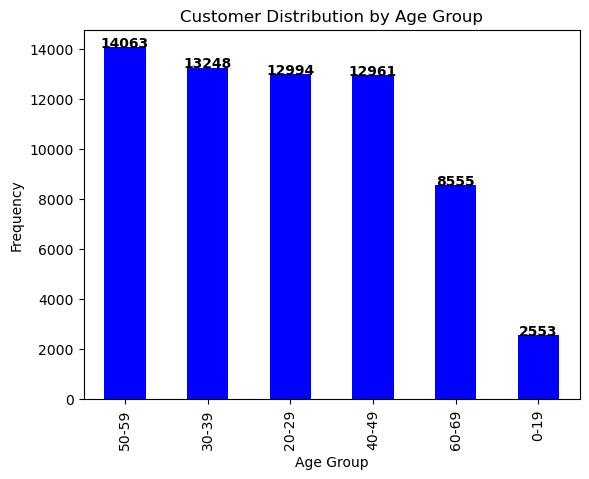

In [16]:
# Plot bar chart that shows Customer Distribution by Age Group

# Define the 'Age Group' variable
age_bins = [0, 19, 29, 39, 49, 59, 69]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69']
df['Age Group'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels)

# Plot the bar chart
df['Age Group'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Customer Distribution by Age Group')

# Add data labels
for index, value in enumerate(df['Age Group'].value_counts()):
    plt.text(index, value + 0.5, str(value), ha='center', fontweight='bold')
plt.show()

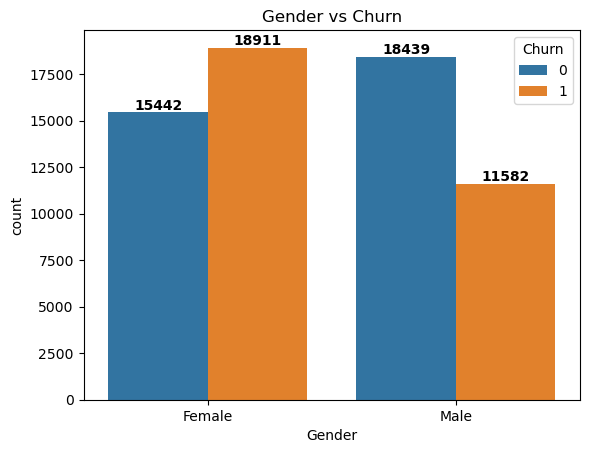

In [18]:
# Grouped bar plot  to check churn rates by gender
sns.countplot(x = 'Gender', hue = 'Churn', data = df)
plt.title('Gender vs Churn')

# Add data labels to the bar plot
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, fontweight='bold')
plt.show()

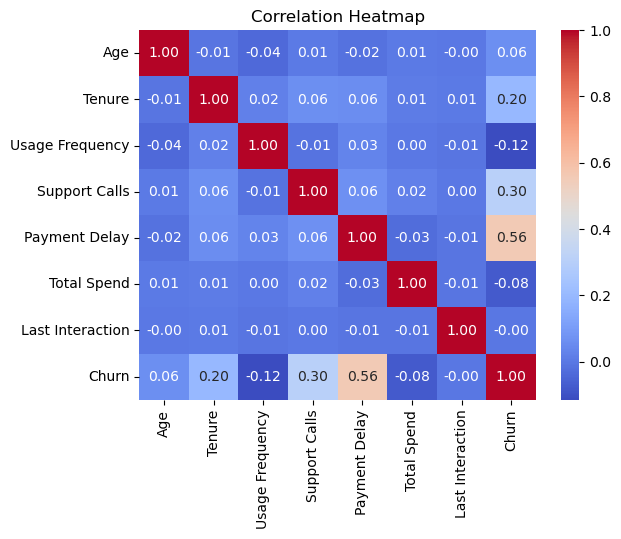

In [22]:
# Create correlation heatmap  to show r/ship between the different variables
# Calculate correlation matrix
corr_matrix = df[['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction','Churn']].corr()

# Plot correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()